## Capstone Project

In [36]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [37]:
## read the data
data = pd.read_csv('data.csv')

In [38]:
data.head()

,hotel,is_canceled,lead_time,Unnamed: 3,Unnamed: 4,arrival_date_week_number,Unnamed: 6,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,Unnamed: 13,reserved_room_type,customer_type,adr,total_of_special_requests
0,Resort Hotel,0,68,NaN,NaN,27,NaN,0,4,2,0,0,BB,NaN,D,Transient,97.00,3
1,Resort Hotel,0,14,NaN,NaN,27,NaN,0,2,2,0,0,BB,NaN,A,Transient,98.00,1
2,Resort Hotel,0,10,NaN,NaN,27,NaN,0,2,2,2,0,BB,NaN,G,Transient,153.00,0
3,Resort Hotel,0,9,NaN,NaN,27,NaN,0,1,2,0,0,BB,NaN,C,Transient,94.71,0
4,Resort Hotel,0,51,NaN,NaN,28,NaN,1,3,2,0,0,BB,NaN,G,Transient,117.81,2


In [39]:
## only keep the useful variables

variables = ['hotel', 'is_canceled', 'lead_time', 'arrival_date_week_number', 'stays_in_weekend_nights', 'stays_in_week_nights',
            'adults', 'children', 'babies', 'meal', 'reserved_room_type', 'customer_type', 'adr', 'total_of_special_requests']
data = data[variables]

In [40]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,reserved_room_type,customer_type,adr,total_of_special_requests
0,Resort Hotel,0,68,27,0,4,2,0,0,BB,D,Transient,97.00,3
1,Resort Hotel,0,14,27,0,2,2,0,0,BB,A,Transient,98.00,1
2,Resort Hotel,0,10,27,0,2,2,2,0,BB,G,Transient,153.00,0
3,Resort Hotel,0,9,27,0,1,2,0,0,BB,C,Transient,94.71,0
4,Resort Hotel,0,51,28,1,3,2,0,0,BB,G,Transient,117.81,2


In [ ]:
# look at the hotel varaible

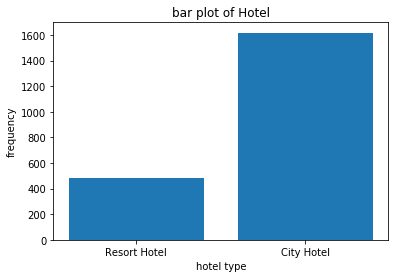

In [45]:
plt.figure()
x = ['Resort Hotel', 'City Hotel']
y = [len(data[data['hotel']=='Resort Hotel']), len(data[data['hotel']=='City Hotel'])]
plt.bar(x,y)
plt.title('bar plot of Hotel')
plt.xlabel('hotel type')
plt.ylabel('frequency')
plt.show()

In [27]:
df = data.copy() # make a copy of data

In [7]:
## Transfrom all the classes to integer variables

In [28]:
set(df['meal']) # the variable 'meal' contains 4 classes

{'BB', 'HB', 'SC', 'Undefined'}

In [29]:
set(df['customer_type']) # the variable 'customer_type' contains 4 classes

{'Contract', 'Group', 'Transient', 'Transient-Party'}

In [30]:
set(df['reserved_room_type']) # the variable 'reserved_room_type' contains 8 classes

{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'}

In [31]:
## change classes into integers
df.loc[:,'hotel'] =  df.loc[:,'hotel'].map({'Resort Hotel': 0, 'City Hotel': 1}) 
df.loc[:,'meal'] =  df.loc[:,'meal'].map({'BB': 0, 'HB': 1, 'SC': 2, 'Undefined': 3}) 
df.loc[:,'customer_type'] =  df.loc[:,'customer_type'].map({'Contract': 0, 'Group': 1, 'Transient': 2, 
                                                            'Transient-Party': 3}) 
df.loc[:,'reserved_room_type'] =  df.loc[:,'reserved_room_type'].map({'A': 0, 'B': 1, 'C': 2, 'D':3,
                                                            'E': 4, 'F': 5, 'G': 6, 'H': 7}) 

In [32]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,reserved_room_type,customer_type,adr,total_of_special_requests
0,0,0,68,27,0,4,2,0,0,0,3,2,97.00,3
1,0,0,14,27,0,2,2,0,0,0,0,2,98.00,1
2,0,0,10,27,0,2,2,2,0,0,6,2,153.00,0
3,0,0,9,27,0,1,2,0,0,0,2,2,94.71,0
4,0,0,51,28,1,3,2,0,0,0,6,2,117.81,2


In [33]:
##get rid of any incomplete rows
df.dropna(inplace=True) 

In [34]:
## normalize 'adr'
adr = df.loc[:,'adr']
adr = np.asarray(list(adr))
adr = preprocessing.normalize([adr])
adr = adr[0]
df['adr'] = adr

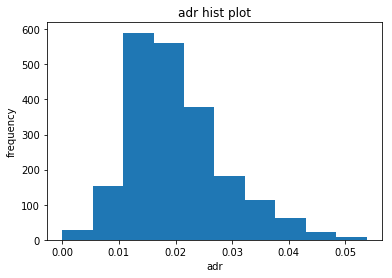

In [35]:
## see if there are any outliers
plt.figure()
plt.title("adr hist plot")
plt.xlabel("adr")
plt.ylabel("frequency")
plt.hist(adr)
plt.show()

In [16]:
## check if there are any highly correlated variables
M=np.asarray(df)
M=M.T
corr = np.corrcoef(M)
corr

array([[ 1.        ,  0.11305071,  0.11294372, -0.05244307,  0.05328903,
        -0.01126115, -0.08585119, -0.09461153, -0.0559187 ,  0.27343894,
        -0.32811004,  0.07279296, -0.11463942,  0.00601701],
       [ 0.11305071,  1.        ,  0.13992583, -0.00993237,  0.0826578 ,
         0.09688077,  0.07294969,  0.08726511, -0.03001242,  0.10461888,
         0.04260329, -0.1302736 ,  0.13888499, -0.14473668],
       [ 0.11294372,  0.13992583,  1.        ,  0.05370667,  0.13111687,
         0.07972113,  0.08180164,  0.01428244,  0.01725407, -0.09838121,
        -0.08387134,  0.27083587, -0.09032345,  0.1201823 ],
       [-0.05244307, -0.00993237,  0.05370667,  1.        , -0.00375102,
         0.05639339,  0.02573927,  0.02840781, -0.01498132, -0.00957042,
         0.03261557, -0.13104449,  0.1499269 ,  0.01484513],
       [ 0.05328903,  0.0826578 ,  0.13111687, -0.00375102,  1.        ,
         0.31871882, -0.06288422,  0.02845805, -0.0108669 , -0.07627132,
         0.01926985,  0.06

In [17]:
corr>0.5

array([[ True, False, False, False, False, False, False, False, False,
        False, False, False, False, False],
       [False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False],
       [False, False,  True, False, False, False, False, False, False,
        False, False, False, False, False],
       [False, False, False,  True, False, False, False, False, False,
        False, False, False, False, False],
       [False, False, False, False,  True, False, False, False, False,
        False, False, False, False, False],
       [False, False, False, False, False,  True, False, False, False,
        False, False, False, False, False],
       [False, False, False, False, False, False,  True, False, False,
        False, False, False, False, False],
       [False, False, False, False, False, False, False,  True, False,
        False, False, False, False, False],
       [False, False, False, False, False, False, False, False,  True,
        F

In [18]:
## Add 2 variables: stays_in_night and total, for further usage.
df['stays_in_night'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
df['total'] = df['adults'] + df['children'] + df['babies']

In [19]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,reserved_room_type,customer_type,adr,total_of_special_requests,stays_in_night,total
0,0,0,68,27,0,4,2,0,0,0,3,2,0.015881,3,4,2
1,0,0,14,27,0,2,2,0,0,0,0,2,0.016045,1,2,2
2,0,0,10,27,0,2,2,2,0,0,6,2,0.025050,0,2,4
3,0,0,9,27,0,1,2,0,0,0,2,2,0.015506,0,1,2
4,0,0,51,28,1,3,2,0,0,0,6,2,0.019288,2,4,2


In [20]:
## Split data into training and test sets
np.random.seed(1)
ind = np.random.permutation(len(df)) # randomly arrange rows
train = df.iloc[ : int(0.7*len(df))] #take 70% of data as training set
test = df.iloc[int(0.7*len(df)) : int(0.85*len(df))] #take 15% of data as testing set
valid = df.iloc[int(0.85*len(df)) : ] #take 15% of data as validation set

In [21]:
## store the data
train.to_csv('data/train.csv', header=True, index=False)
test.to_csv('data/test.csv', header=True, index=False)
valid.to_csv('data/valid.csv', header=True, index=False)